# Dimensions for the FOXSI Honeycomb Collimator
## Meeting with MIKRO, October 2016.
Milo Buitrago-Casas @ UCBerkeley

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
sb.plotting_context("poster")
import numpy as np
from IPython.display import Image
import plotly.plotly as py
from plotly.tools import FigureFactory as FF 

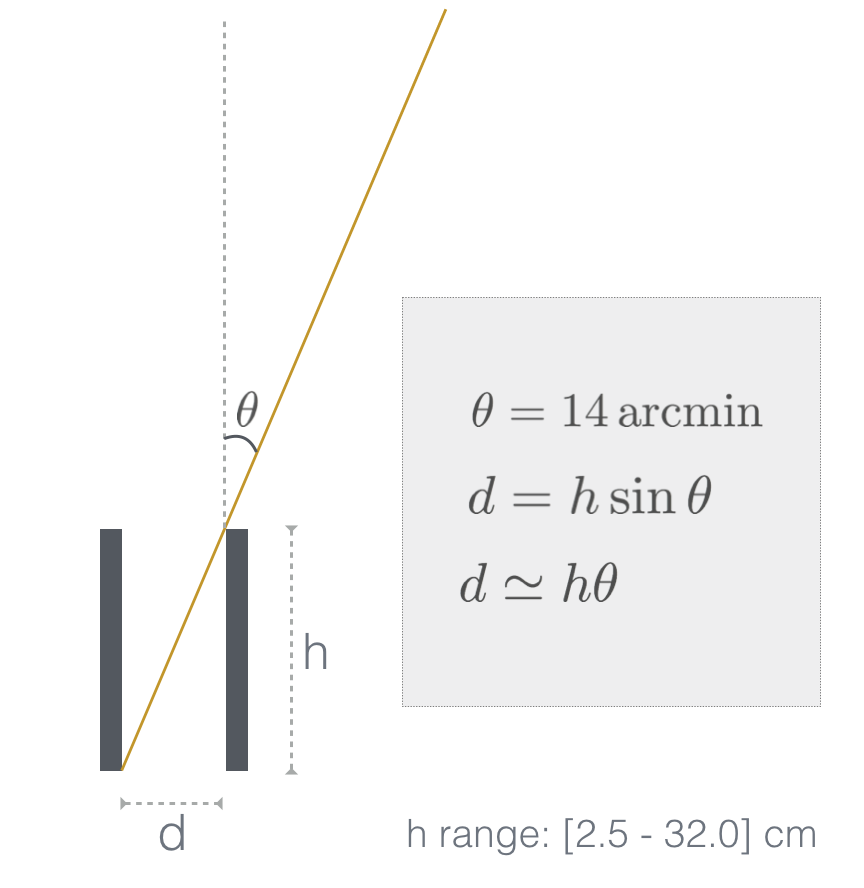

In [15]:
Image("img/concept.png",width=500)

In [104]:
hmin = 2.5    #h_min in cm
hmax = 32.0   #h_max in cm
theta = 14    #angle in arcmin

h = np.linspace(hmin, hmax, num=118)
theta_arcmin = np.deg2rad(theta/60)
d = h * np.sin(theta_arcmin)

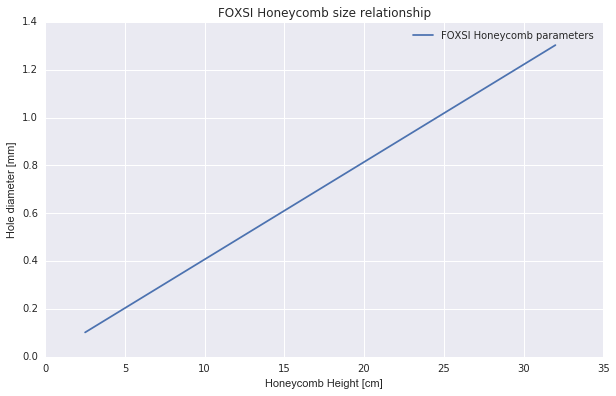

In [117]:
# Plotting
f, ax = plt.subplots(figsize=(10,6))
ax.plot(h, d*1e1, label='FOXSI Honeycomb parameters')
ax.legend(loc='best')
ax.set_title('FOXSI Honeycomb size relationship')
ax.set_xlabel('Honeycomb Height [cm]')
ax.set_ylabel('Hole diameter [mm]')

In [150]:
a = [h, d*10]
data_matrix = np.array(a).T.tolist()
data_matrix1 = [['Honeycomb Height [cm]','Hole diameter [mm]']] + data_matrix

In [151]:
table = FF.create_table(data_matrix1)
py.iplot(table, filename='simple_table')

In [155]:
np.savetxt("foo.csv", data_matrix, delimiter=",")

## Quick estimate of the lossing in the effective area on-axis

For simplicity let's consider a honeycomb with squared holes.

The lossing in effective area is given by:

$1 - \frac{(d_h - d_s)^2}{(d_h+d_s)^2}$

with $d_h$ =: Hole diameter and $d_s$ =: septa thickness 


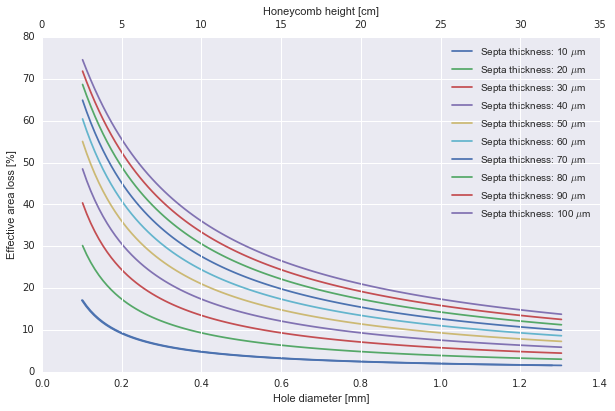

In [195]:
dh = 10*d
ds = np.linspace(0.01, 0.1, num=10) # Septa thickness [in microns]

loss = []
for i in range (0,len(ds)):
    loss.append( 1 - (dh)**2 / (dh + ds[i])**2 )


f1, ax1 = plt.subplots(figsize=(10,6))
ax2 = ax1.twiny()
ax2.plot(h, loss[0]*100, label='Septa thickness: %d $\mu$m'%(1e3*ds[i]))
ax2.set_xlabel('Honeycomb height [cm]')

for i in range (0,len(ds)):
    ax1.plot(dh, loss[i]*100, label='Septa thickness: %d $\mu$m'%(1e3*ds[i]))
ax1.legend(loc='best')
ax1.set_xlabel('Hole diameter [mm]')
ax1.set_ylabel('Effective area loss [%]')